<a href="https://colab.research.google.com/github/Nitesh167/machinelearning/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Task #1**

**Prediction using Supervised ML**

**Author : Nitesh Pandit**

**Predict the percentage of an student based on the no. of study hours.**

This is a simple linear regression task as it involves just 2 variables.

Data can be found at http://bit.ly/w-data

In [131]:
#importing libaries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt  
%matplotlib inline

In [132]:
#importing dataset from the link
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [133]:
#displaying the top 10 rows of the dataframe
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [134]:
#displaying some statistical data of dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Visual exploratory data analysis**
I visualize the relationship between X and y by plotting a scatterplot between X and y.

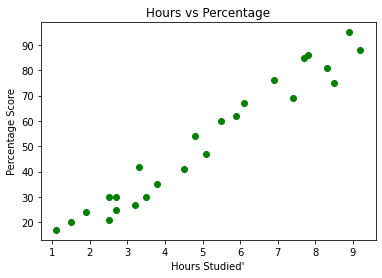

In [135]:
# Plotting the distribution of scores
plt.scatter(df.Hours,df.Scores, color ="green")
plt.xlabel("Hours Studied'")
plt.ylabel("Percentage Score")
plt.title('Hours vs Percentage')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [136]:
# Declare feature variable and target variable
X = df['Hours'].values
y = df['Scores'].values
# Print the dimensions of X and y
print(X.shape)
print(y.shape)


(25,)
(25,)



# **Reshaping X and y**
Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

In [137]:
# Reshape X and y
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print("Reshaping done")

Reshaping done


# **Preparing the data**
Splitting the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.

In [138]:
# Split X and y into training and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Splitting complete")

Splitting complete


# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [139]:
model = LinearRegression()
# Train the model using training data sets
model.fit(X_train,y_train)
print("Training complete.")
# Predict on the test data
y_pred=model.predict(X_test)

Training complete.


In [140]:
# Compute model slope and intercept
a = model.coef_
b = model.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[9.91065648]]
Estimated model intercept, b: (array([2.01816004]),)


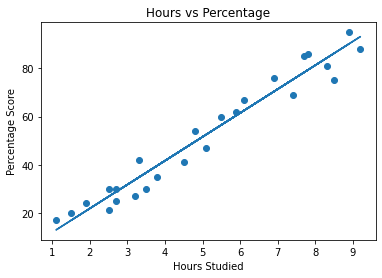

In [141]:
# Plotting the regression line
line = a*X+b
# Plotting for the test data
plt.scatter(X, y)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title('Hours vs Percentage')  
plt.plot(X, line);
plt.show()

# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [142]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted values**

In [143]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [146]:
output =model.predict([[0]])
print(output)
print("For student studies 9.25 hrs/day ,the percentage of marks scored is approx: %.f" % ( output))

[[2.01816004]]
For student studies 9.25 hrs/day ,the percentage of marks scored is approx: 2


# **Evaluating the model**
**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error,root mean square,mean absolute error. There are many such metrics.**

In [145]:
 #Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))
print("MSE value: {:.4f}".format(mse))
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

RMSE value: 4.6474
R2 Score value: 0.9455
MSE value: 21.5988
Mean Absolute Error: 4.183859899002982
